<a href="https://colab.research.google.com/github/pablillo77/datascience3/blob/main/Proyecto_Final_DS2_Pablo_Gim%C3%A9nez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:12px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Primera preentrega del proyecto Final</b></div>




<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Abstracto, objetivos y audiencia 🎬</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:16px">

<h2 align="left"><font color=black>
🎯 El presente estudio tiene por objetivo analizar la performance de un grupo de estudiantes de nivel secundario y entender que factores tienen más peso en el desempeño. Se basa en un dataset de Kaggle que contiene datos de 2392 estudiantes y su performance académica. Está dirigido a docentes, educadores e integrantes del sistema de educación, para darles un marco estadísitico y predictivo en entregas posteriores, que permitan asignar recursos eficientemente y/o formular políticas, estrategias de mejora e incentivos.</h2><br>



## <b>Hipótesis y preguntas planteadas</b>

*   <b>Qué incidencia y peso tienen las variables actitudinales como hábitos de estudio, horas de estudio, ausencias, tutorías, participación de los padres y actividades extracurriculares?</b>
*  <b>Se relaciona el desempeño con factores demográficos? Estos pueden incluir educación de los padres, minorias sociales que indiquen si se necesita investigar más en profundidad el acceso a los recursos educativos.</b>
*  <b>Investigar si hay diferencias significativas en las notas separando por grupos, por ejemplo género.</b>
* <b>Sentar las bases para elaborar modelos de predicción de desempeño.</b>

 </b></div>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳Carga del dataset desde GitHub⏳
 </b></div>


In [1]:
#Importamos librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [44]:
#Carga del dataset en formato csv desde mi github pasandole la url la método .read_csv()
url = 'https://raw.githubusercontent.com/pablillo77/datascience2/main/Student_performance.csv'
df = pd.read_csv(url)
df #checkeamos el dataframe

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


## Descripcion de las columnas


*   StudentID: identificador unico de estudiante, varia de 1001 a 3392
*   Age: Edad de los estudiantes
*   Gender: Género, 0 varones y 1 representa mujeres
*   Etnicity: La etinia de los estudiantes, O: Caucásicos, 1: Afroamericanos, 2 Asáticos, 3: otros
*   Parental Education: Nivel de educación de los padres, 0: Ninguno, 1: Secundario, 2: Terciario, 3: Titulo de Grado, 4: Superior
*   StudyTimeWeekly: horas de estudio semanales
*   Absences: Cantidad de ausencias en el año escolar
*   Tutoring: Si tiene tutores, 0: no, 1: sí
*   ParentalSupport: Nivel de apoyo de los padres, codificado como 0: ninguno, 1: bajo, 2: moderado, 3: alto, 4: muy alto
*   Extracurricular: Participación en actividades extracuriculares
*   Sports: Participación en deportes, 0:no, 1:sí
*   Music: Participación en actividades musicales, 0:no, 1:sí
*   Volunteering: Participación en voluntariados, 0:no, 1:sí
*   GPA: Puntuación promedio de notas, varia entre 2 y 4 el rango de aprobación.
*   GradeClass: Clasificación de las notas basadas en GPA con el  siguiente criterio:
0: 'A' (GPA >= 3.5),
1: 'B' (3.0 <= GPA < 3.5),
2: 'C' (2.5 <= GPA < 3.0),
3: 'D' (2.0 <= GPA < 2.5),
4: 'F' (GPA < 2.0)






<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Limpieza de los datos 🧹</b></div>

In [45]:
df.info() #verificamos los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [46]:
df.duplicated().sum() #verificamos que no existen valores duplicados

0

In [47]:
# Transformaremos la columna GradeClass de acuerdo con las notas A-F
# Definimos una función

def categoria_gpa(gpa):
  if gpa >= 3.5:
    return 'A'
  elif 3.0 <= gpa < 3.5:
    return 'B'
  elif 2.5 <= gpa < 3.0:
    return 'C'
  elif 2.0 <= gpa < 2.5:
    return 'D'
  else:
    return 'F'

#Aplicamos la función reasignando las categorias nuevas a GradeClass
df['GradeClass'] = df['GPA'].apply(lambda x: categoria_gpa(x))

df.set_index('StudentID', inplace=True) #redefinimos como index a StudentID, para poder identificar alumnos de ser necesario.
#df.drop(columns=["GPA"], inplace=True) #eliminamos la columna GPA.
df.head()




,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,C
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,B
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,F
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,D
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,F


In [48]:
df["GradeClass"] = df["GradeClass"].astype('category') #convertimos la columna GradeClass a tipo categórica

In [49]:
df.info() #verificamos los tipos de datos nuevamente

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                2392 non-null   int64   
 1   Gender             2392 non-null   int64   
 2   Ethnicity          2392 non-null   int64   
 3   ParentalEducation  2392 non-null   int64   
 4   StudyTimeWeekly    2392 non-null   float64 
 5   Absences           2392 non-null   int64   
 6   Tutoring           2392 non-null   int64   
 7   ParentalSupport    2392 non-null   int64   
 8   Extracurricular    2392 non-null   int64   
 9   Sports             2392 non-null   int64   
 10  Music              2392 non-null   int64   
 11  Volunteering       2392 non-null   int64   
 12  GPA                2392 non-null   float64 
 13  GradeClass         2392 non-null   category
dtypes: category(1), float64(2), int64(11)
memory usage: 264.2 KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* GradeClass ahora refleja las calificaciones según el criterio expuesto, basado en el GPA y queda como variable categórica.
* No existen valores nulos o inconsistentes en cuanto a tipos de datos.
* No hay valores duplicados.
* Las variables necesarias ya se encuentran codificadas.
* StudentID se redefine como index.
* Por el momento no es necesaria limpieza o procesamiento de los datos adicionalmente.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🔎 Análisis Exploratorio de los datos.🔎</b></div>

In [20]:
#analizamos las estadísticas descriptivas de las variables utilizando describe en un primer enfoque
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


In [21]:
df.describe(include='category').T #analizamos las estadísticas descriptivas de las variables categóricas

,count,unique,top,freq
GradeClass,2392,5,F,1274


In [22]:
col_value = df.GradeClass.groupby(df.GradeClass).count()
col_value #chequeamos la distribución de las notas categóricas

<ipython-input-22-a06eeec751cd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  col_value = df.GradeClass.groupby(df.GradeClass).count()


,GradeClass
GradeClass,
A,77
B,244
C,385
D,412
F,1274


<a id="1"></a>
## <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Análisis de Outliers🧠</b></div>

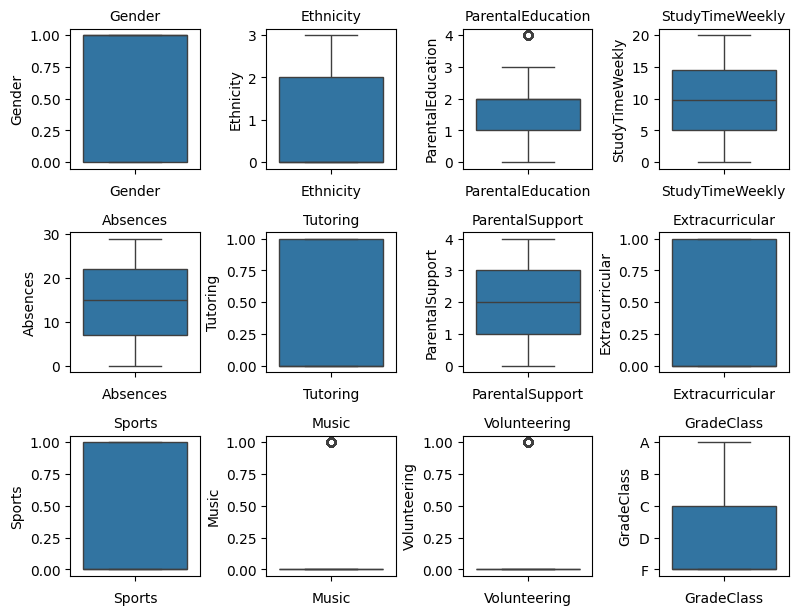

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))  # Creamos una grilla de 4x4 para los subplots

for i, col in enumerate(df.columns[1:]):
    fila = i // 4  # Calculamos la fila del subplot con el resto de la div entera
    col_num = i % 4   # Calculamos la columna con la division entera
    sns.boxplot(data=df[col], ax=axes[fila, col_num])  # Dibujamos el boxplot en el subplot correspondiente
    axes[fila, col_num].set_title(f'{col}', fontsize=10)
    axes[fila, col_num].set_xlabel(col)
for j in range(i + 1, 16):
    fig.delaxes(axes.flatten()[j])  # Eliminamos los subplots vacíos
plt.tight_layout()  # Ajustamos el espaciado entre subplots
plt.show()  # Mostramos la figura con todos los subplots


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* Music, Volunteering y Parental Education, presentan datos válidos, sólamente se encuentran sus valores en desbalance. Los outliers en este dataset no presentan problemas para el análisis.


<a id="1"></a>
## <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>☀️ Visualizaciones y búsqueda de relaciones☀️</b></div>

In [12]:
# Crear una paleta de colores personalizada
custom_palette = sns.color_palette(["#3498db", "#2ecc71", "#fbaf05", "#9b59b6", "#f1c40f"])

# Aplicar la paleta personalizada a Seaborn
sns.set_palette(custom_palette)

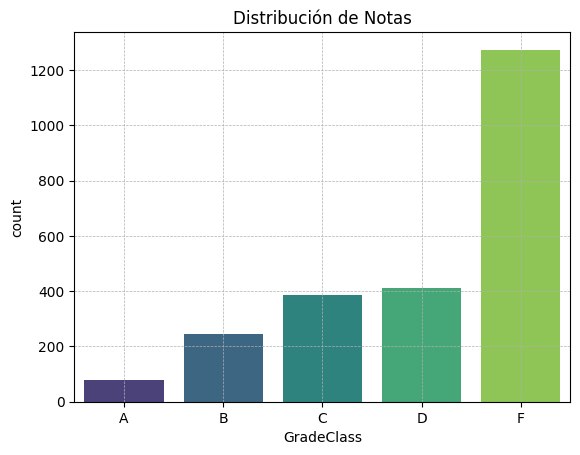

In [13]:
#grafico las el conteo de categoría de notas ordenado alfabeticamente
order = ["A", "B", "C", "D", "F"]
sns.countplot(x=df.GradeClass, hue=df.GradeClass, order=order, palette='viridis')
plt.title('Distribución de Notas')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

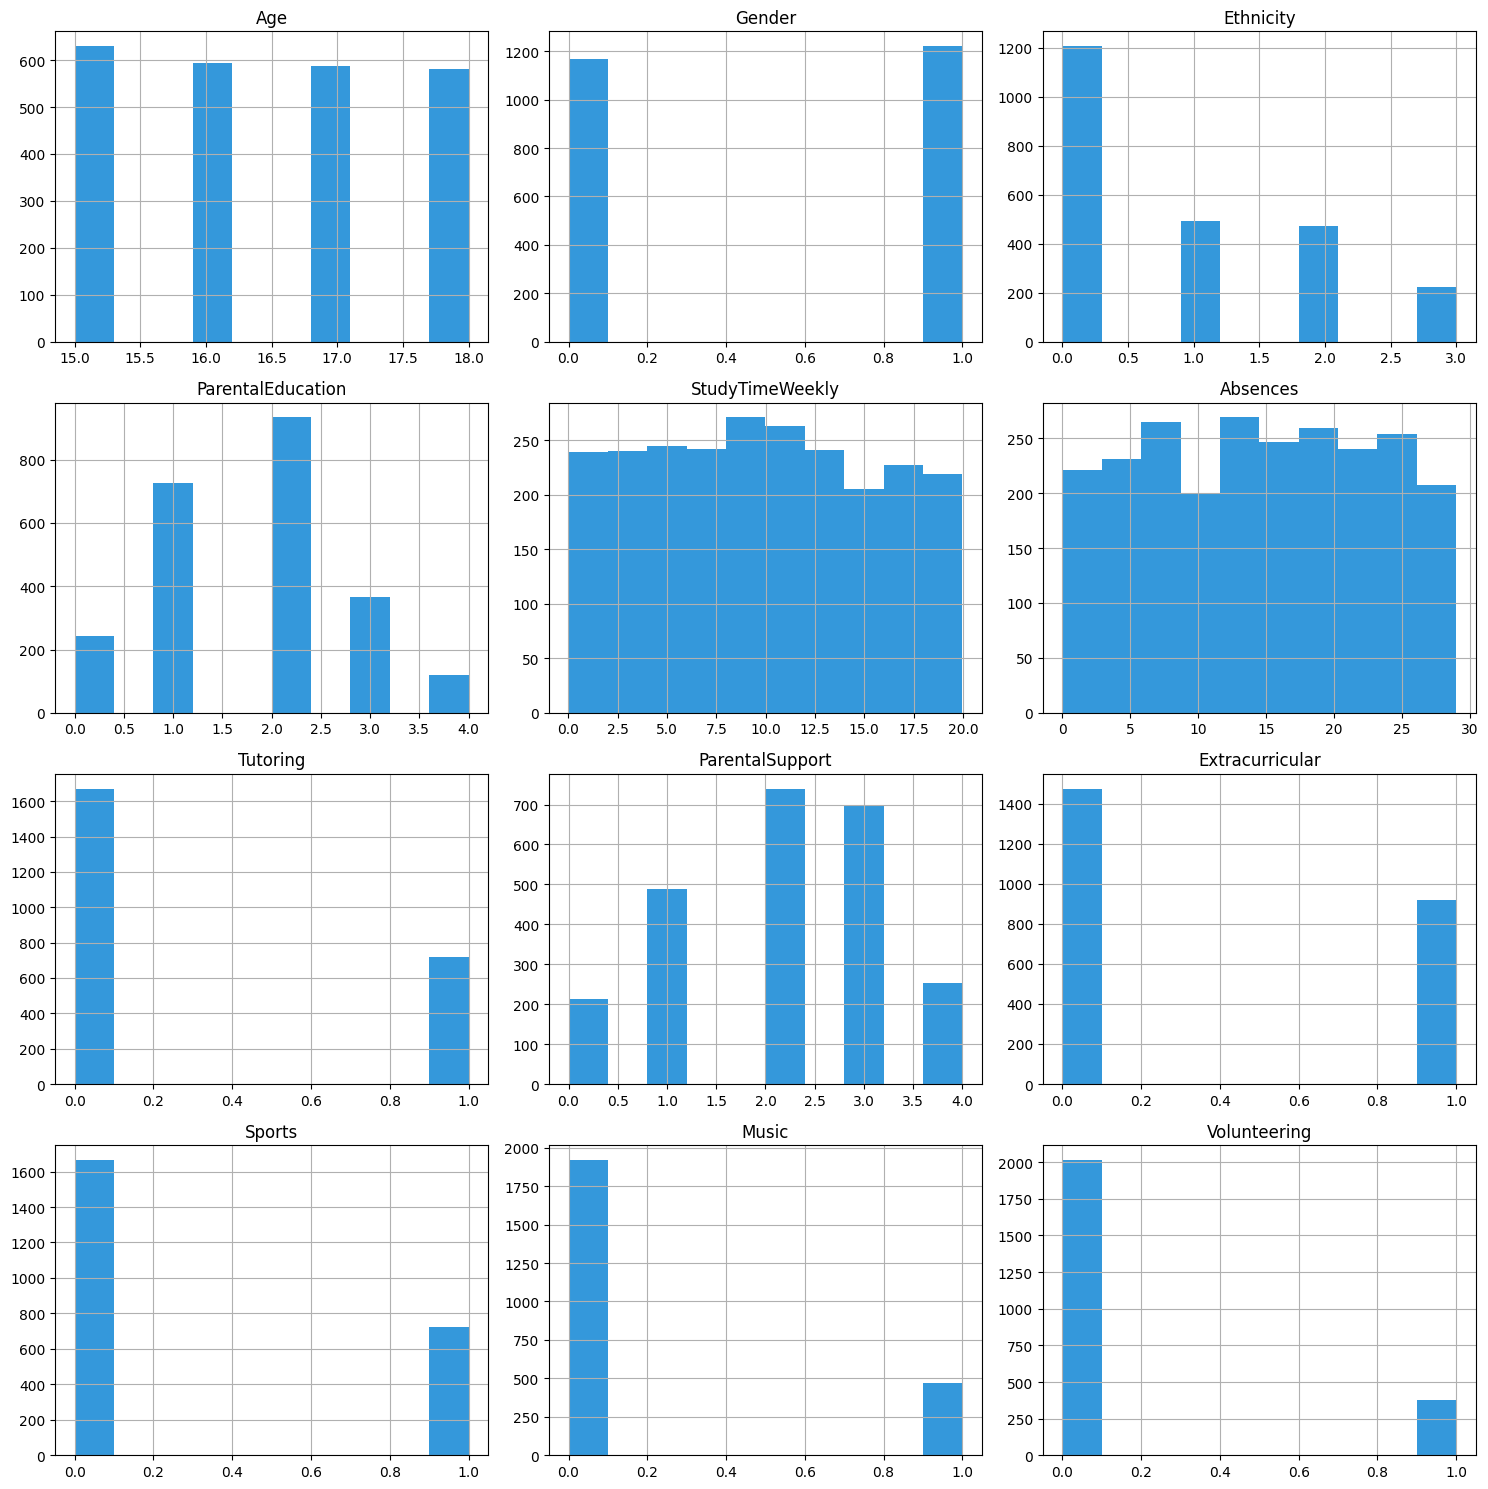

In [14]:
#graficamos las distribuciones de las variables en primera aproximación
df.hist(figsize=(15, 15))
plt.savefig('histograma.png')
plt.tight_layout()

Text(0.5, 0, 'Horas')

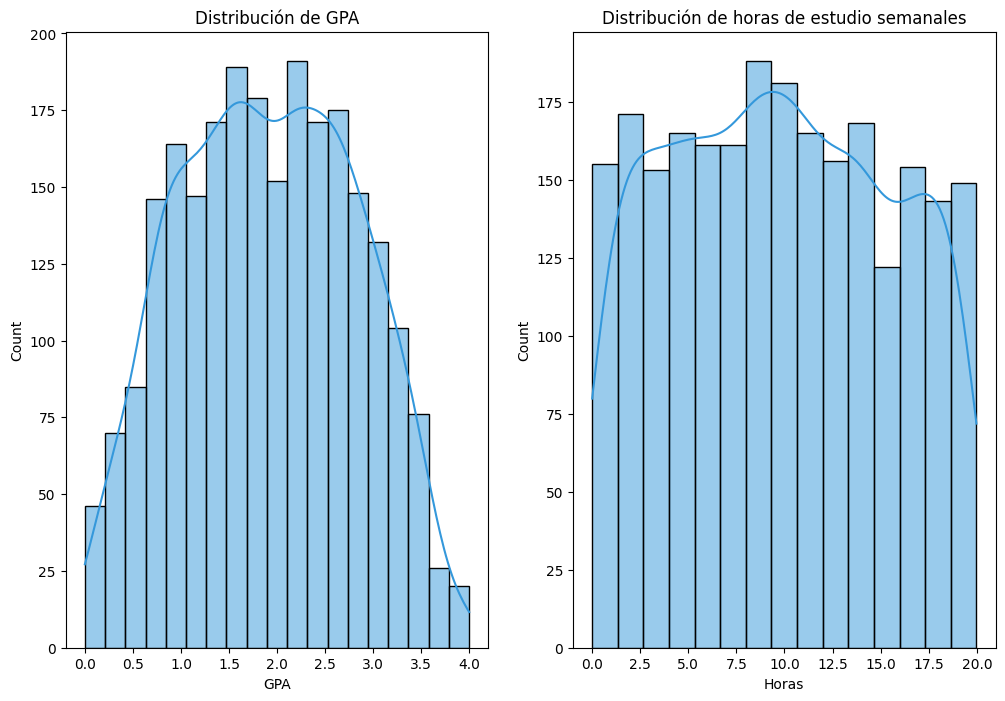

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12 , 8))
sns.histplot(df['GPA'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de GPA')
axes[0].set_xlabel('GPA')
sns.histplot(df['StudyTimeWeekly'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de horas de estudio semanales')
axes[1].set_xlabel('Horas')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* Los conteos de características como 'Ethnicity', 'ParentalEducation', 'Tutoring', 'Extracurricular', 'Sports', 'Music' y 'Volunteering' evidencian cierto desbalance en cantidades, lo cual debe ser tenido en cuenta si se desean extraer conclusiones basados en ellos o entrenar modelos predictivos.

* GPA presenta una distribución que se asemeja a una normal.


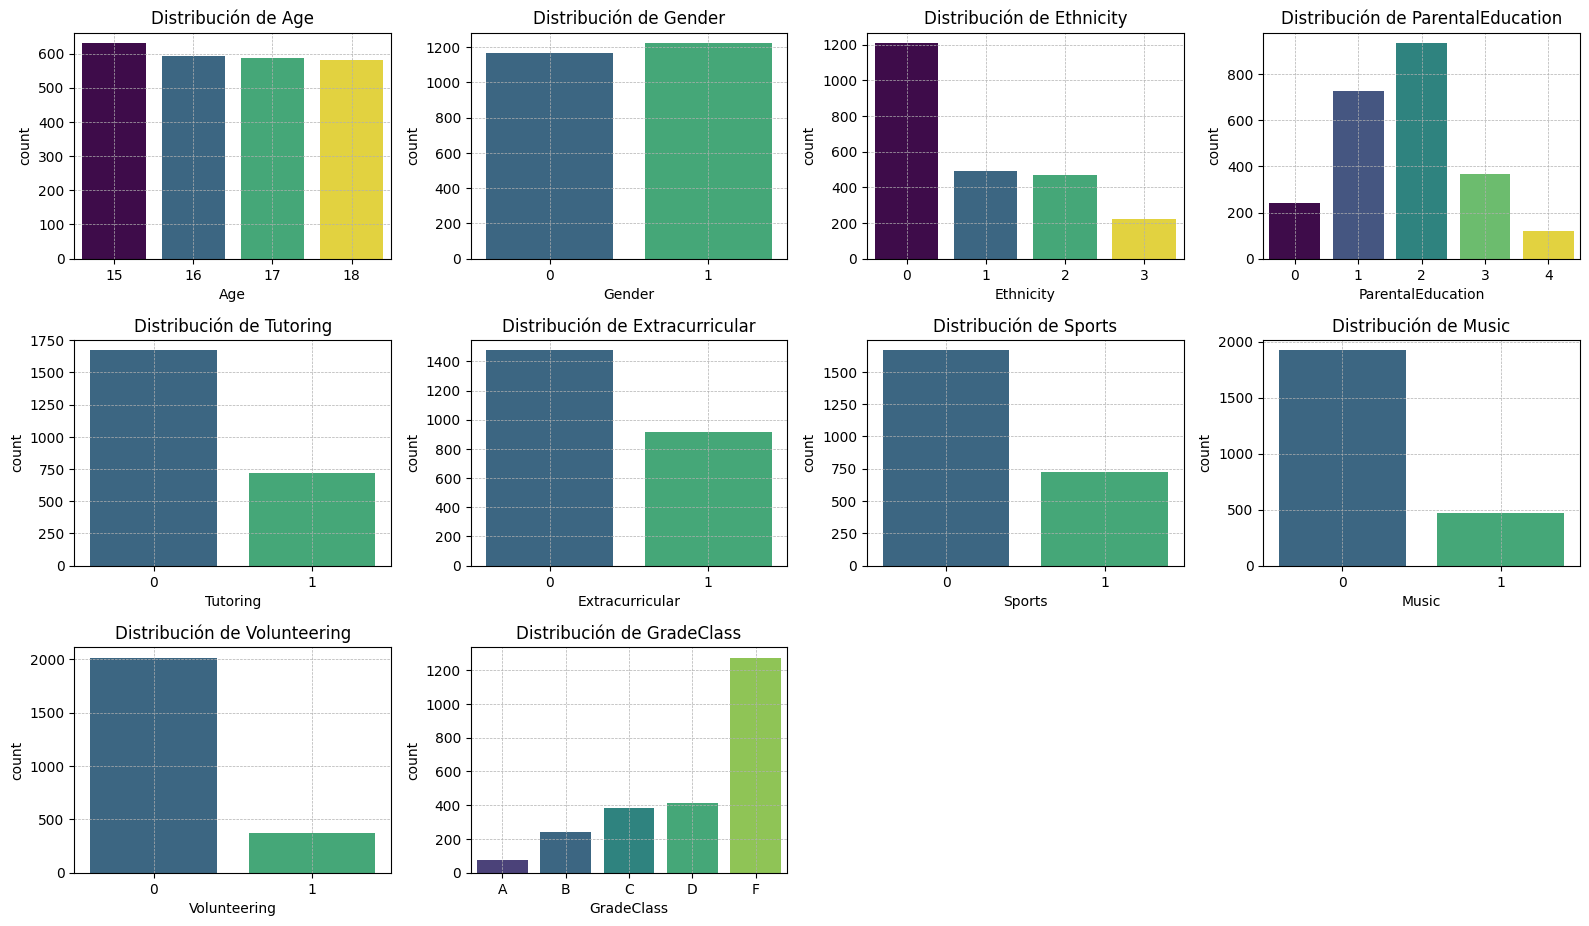

In [24]:
# Crear una grilla de subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

# Lista de columnas para las que deseas crear countplots
lista_grafico = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

# Iteracion y creacion
for i, col in enumerate(lista_grafico):
    if col in df.columns:
        sns.countplot(x=df[col], hue=df[col], palette='viridis', ax=axes[i])
        axes[i].set_title(f'Distribución de {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
        axes[i].legend('Any').remove()

# Eliminar subplots vacíos (i contiene el numero del ultimo subplot graficado)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [25]:
# Vamos a comparar y revisar relaciones entre variables dicotómicas y la puntuacion GPA

# Definir las columnas dicotómicas
columns = ['Tutoring', 'Gender', 'Extracurricular','Sports','Music','Volunteering']

# Iterar sobre las columnas y calcular la correlación
for column in columns:
    coeficiente, p_valor = stats.pointbiserialr(df[column], df.GPA) #biserial puntual
    print(f"Coeficiente de correlación de punto biserial para {column}: {coeficiente}")
    print(f"P-valor: {p_valor}")


Coeficiente de correlación de punto biserial para Tutoring: 0.1451189199678037
P-valor: 9.923854014272825e-13
Coeficiente de correlación de punto biserial para Gender: -0.013359974928969433
P-valor: 0.5136929146255017
Coeficiente de correlación de punto biserial para Extracurricular: 0.09407831930111069
P-valor: 4.045914079603939e-06
Coeficiente de correlación de punto biserial para Sports: 0.05785908706746863
P-valor: 0.004645076418989431
Coeficiente de correlación de punto biserial para Music: 0.07331799243401449
P-valor: 0.0003322056376183091
Coeficiente de correlación de punto biserial para Volunteering: 0.0032579140666671343
P-valor: 0.8734676196675222


In [26]:
#Defino las columnas ordinales
columns = ['Age', 'ParentalEducation', 'Absences'] #Age y Absences las pienso como ordinales aqui

# Calcular el coeficiente de Spearman
for column in columns:
    coeficiente, p_valor = stats.spearmanr(df[column], df["GPA"])
    print(f"Coeficiente de correlación de Spearman para {column}: {coeficiente}")
    print(f"P-valor: {p_valor}")



Coeficiente de correlación de Spearman para Age: -0.002074558485352599
P-valor: 0.9192252043641757
Coeficiente de correlación de Spearman para ParentalEducation: -0.03464799723831045
P-valor: 0.09022921782943195
Coeficiente de correlación de Spearman para Absences: -0.9254668628460838
P-valor: 0.0


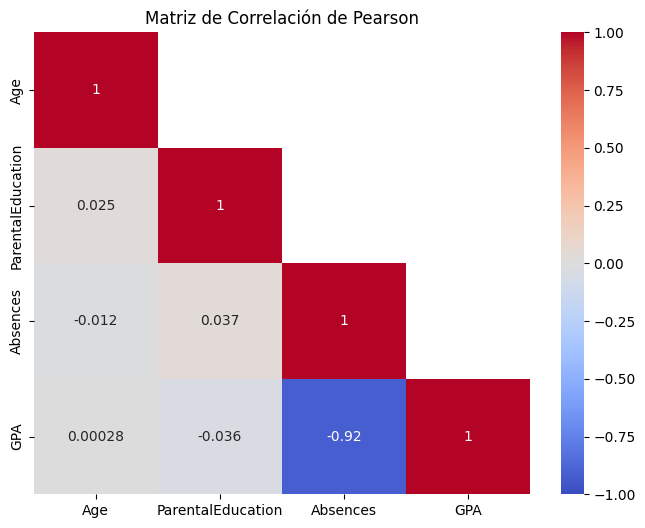

In [29]:
# Contrastaré ahora con matriz de correlación de Pearson utilizando las columnas Age, ParentalEducation, Absences y GPA
columns = ['Age', 'ParentalEducation', 'Absences', 'GPA']
df_corr = df[columns]
correlation_matrix = df_corr.corr()

# Máscara para quitar la parte superior del gráfico
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Calculamos y graficamos la matriz de correlación de Pearson

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Matriz de Correlación de Pearson')
plt.show()

In [30]:
#Revisaremos las relaciones entre variables ordinales y las ausencias,
#intentando entender si existen relaciones adicionales

#Defino las columnas ordinales
columns = ['Age', 'ParentalEducation', 'Ethnicity'] #Age y Absences las pienso como ordinales aqui

# Calcular el coeficiente de Spearman
for column in columns:
    coeficiente, p_valor = stats.spearmanr(df[column], df["Absences"])
    print(f"Coeficiente de correlación de Spearman para {column}: {coeficiente}")
    print(f"P-valor: {p_valor}")

Coeficiente de correlación de Spearman para Age: -0.010806499562859596
P-valor: 0.5973159225792366
Coeficiente de correlación de Spearman para ParentalEducation: 0.03521223997739433
P-valor: 0.08510635333694838
Coeficiente de correlación de Spearman para Ethnicity: -0.028493137718692618
P-valor: 0.16358985714658633


In [31]:
# Vamos a comparar y revisar relaciones entre variables dicotómicas y las ausencias

# Definir las columnas dicotómicas
columns = ['Tutoring', 'Gender', 'Extracurricular','Sports','Music','Volunteering']

# Iterar sobre las columnas y calcular la correlación
for column in columns:
    coeficiente, p_valor = stats.pointbiserialr(df[column], df.Absences) #biserial puntual
    print(f"Coeficiente de correlación de punto biserial para {column}: {coeficiente}")
    print(f"P-valor: {p_valor}")

Coeficiente de correlación de punto biserial para Tutoring: -0.01553362580398744
P-valor: 0.4476321669381697
Coeficiente de correlación de punto biserial para Gender: 0.02147922491417813
P-valor: 0.29368150712378976
Coeficiente de correlación de punto biserial para Extracurricular: 0.00036028802301777356
P-valor: 0.9859485555049139
Coeficiente de correlación de punto biserial para Sports: 0.041454120225808806
P-valor: 0.04263654974951877
Coeficiente de correlación de punto biserial para Music: -0.008692102282531554
P-valor: 0.6709097010425155
Coeficiente de correlación de punto biserial para Volunteering: -0.01852806688760463
P-valor: 0.3650543142688919


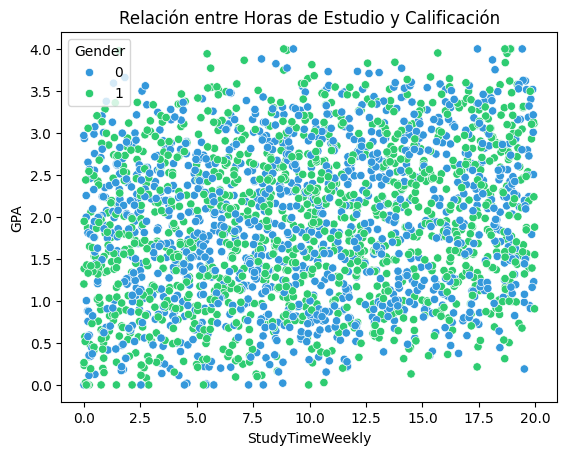

Coeficiente de correlación de Pearson: 0.1792751268560882
P-valor: 1.000201125924497e-18


In [32]:
#Estudiaremos la relación entre las horas de estudio y la performance académica
#más en detalle.

sns.scatterplot(data=df, x='StudyTimeWeekly', y='GPA', hue='Gender')
plt.title('Relación entre Horas de Estudio y Calificación', fontsize=12)
plt.show()
coeficiente, p_valor = stats.pearsonr(df['GPA'], df["StudyTimeWeekly"])
print("Coeficiente de correlación de Pearson:", coeficiente)
print("P-valor:", p_valor)

In [51]:
#Separo en dataframes diferentes considerando los grupos étnicos:

df_etn0 = df[df['Ethnicity'] == 0]
df_etn1 = df[df['Ethnicity'] == 1]
df_etn2 = df[df['Ethnicity'] == 2]
df_etn3 = df[df['Ethnicity'] == 3]

In [52]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Importo el análisis ANOVA de esta librería

formula = 'GPA ~ C(Ethnicity)' #Aqui defino como variable dependiente a GPA e independiente y categórica a Ethnicity, (función C())

model = sm.ols(formula, data=df).fit() #Realizamos el fit
anova_table = anova_lm(model, typ=3) # El parametro typ=3 puede trabajar con datos desbalanceados, igualmente con typ=2 sigue dando un p-value mayor a 0.05, con lo cual, no hay evidencia suficiente
#para indicar que las medias de al menos 2 etnias son diferentes

print(anova_table)


                   sum_sq      df            F    PR(>F)
Intercept     4247.454789     1.0  5071.259708  0.000000
C(Ethnicity)     2.407437     3.0     0.958122  0.411585
Residual      2000.079393  2388.0          NaN       NaN


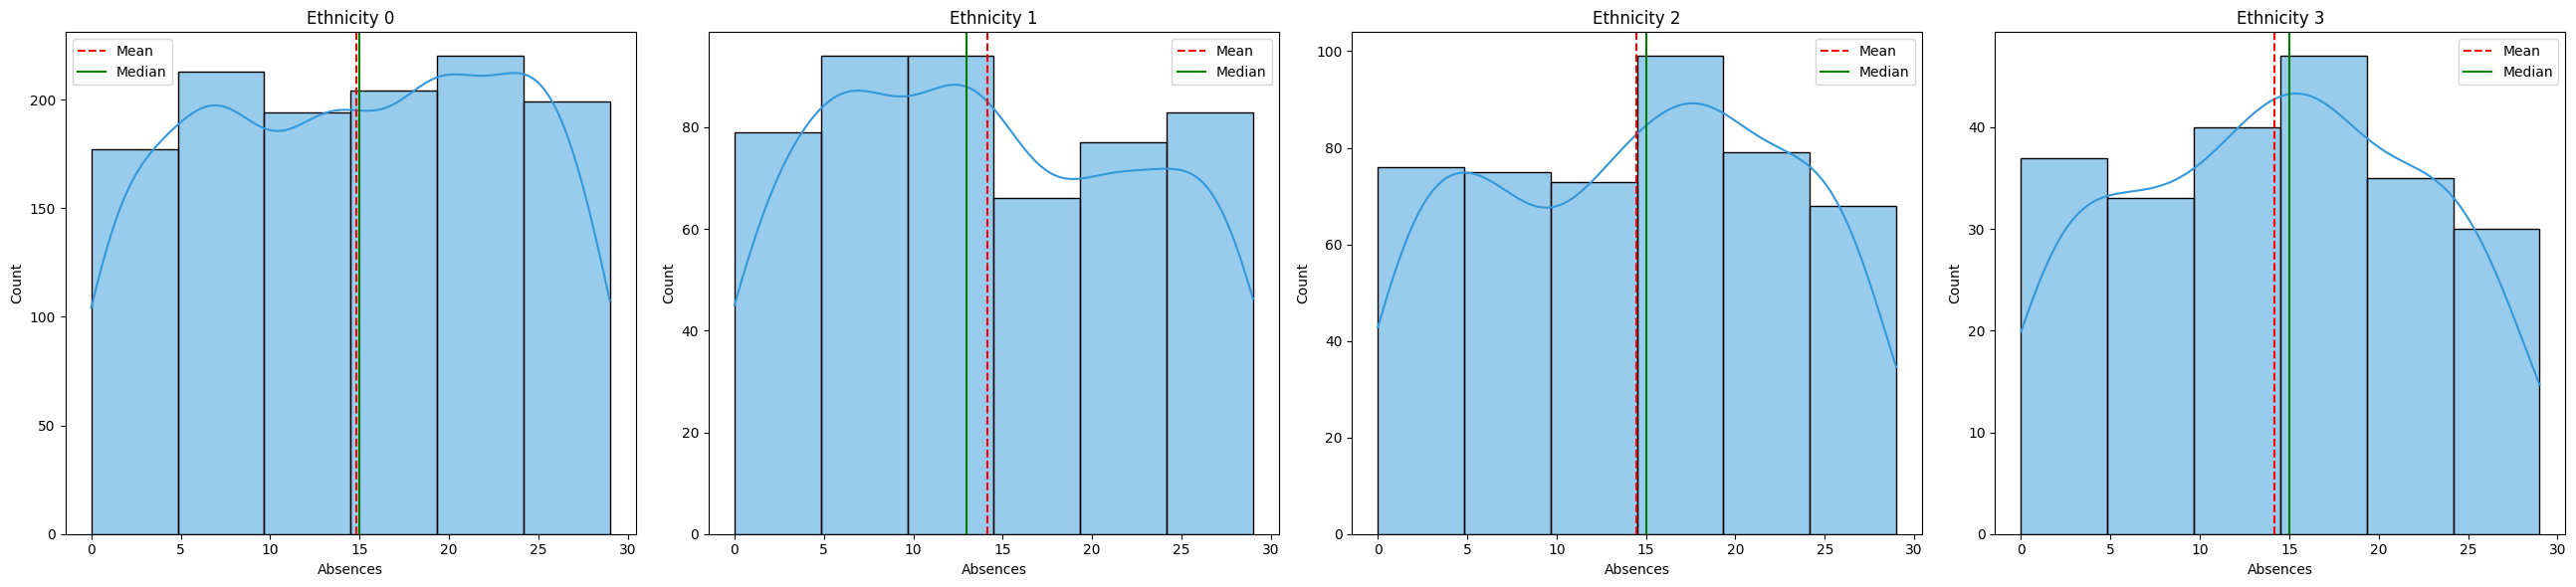

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(26, 6))

for i in range(4):
  df_etn = df[df['Ethnicity'] == i]
  sns.histplot(df_etn["Absences"], bins=6, kde=True, ax=axes[i])
  axes[i].set_title(f"Ethnicity {i}")
  mean_etn = df_etn["Absences"].mean()
  median_etn = df_etn["Absences"].median()
  axes[i].axvline(mean_etn, color='red', linestyle='--', label='Mean')
  axes[i].axvline(median_etn, color='green', linestyle='-', label='Median')
  axes[i].legend()

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insights:</font></h3>

* Tutoring, presenta una correlación positiva débil con el GPA (0.14 p_value= 9E-13).
* No se puede concluir que el resto de las variables binarias incidan en el desempeño.
* En cuanto a las ordinales impresiona solo tener relevancia en el GPA la cantidad de ausencias "Absences", que correlaciona fuerte y negativamente con la puntuación.
* En la investigación de las causas de "Absences" no se encontraron relaciones con otras variables.
* Las horas de estudio semanales, corroborando la intuición, correlacionan positivamente con la nota, pero de manera débil. Del gráfico de dispersión se aprecia que no hay diferenciación en las notas entre hombres y mujeres, se estudiará con tests estadísticos.
* El análisis de varianza, ANOVA, indica que no hay evidencia suficiente para indicar que las medias de GPA son distintas en al menos 2 etnias distintas.
* El ausentismo no está relacionado con las etnias.

In [37]:
#creo dos df separando hombres y mujeres


df_mujeres = df[df['Gender'] ==0]
df_hombres = df[df['Gender'] ==1]


grouped_gender = df.groupby('Gender')['GPA'].agg(['mean', 'median','skew'])
print(grouped_gender) #las medias son similares y cercanas a las medianas

# Intentaremos corroborar normalidad con Shapiro-Wilk

estadistico, p_value = stats.shapiro(df_mujeres['GPA'])
print("\n Estadístico de prueba:", estadistico)
print("P-valor:", p_value, "\n")

estadistico, p_value = stats.shapiro(df_hombres['GPA'])
print("Estadístico de prueba:", estadistico)
print("P-valor:", p_value)



            mean    median      skew
Gender                              
0       1.918679  1.920006 -0.012313
1       1.894225  1.876211  0.040250

 Estadístico de prueba: 0.9814241574307551
P-valor: 4.305574928218884e-11 

Estadístico de prueba: 0.9853533929073474
P-valor: 9.484194994395262e-10


In [39]:
from scipy.stats import ttest_ind
# Vamos a corroborar que no hay diferencia significativa entre las medias de GPA de hombres y mujeres
# Calcular la prueba t de student
# Hipotesis nula, la medias son iguales y Ha, las medias difieren

resultado = ttest_ind(df_mujeres['GPA'], df_hombres['GPA'])

# Imprimir el resultado
print("Estadístico t:", resultado.statistic)
print("Valor p:", resultado.pvalue)

#comprobemos con Wilcoxon, para no depender de la normalidad
# prueba de Wilcoxon

# Asegurar que ambos dataframes tengan la misma longitud antes de resamplear
min_length = min(len(df_mujeres), len(df_hombres))

# Definir la función para calcular la prueba de Wilcoxon
def wilcoxon_statistic(sample1, sample2):
    w = stats.wilcoxon(sample1, sample2)
    return w

# Configuración de parámetros para bootstrapping
n_iterations = 1000
statistics = []

# Realizar el muestreo de 1000 muestras
for _ in range(n_iterations):
    sample_mujeres = df_mujeres['GPA'].sample(n=min_length, replace=True).values
    sample_hombres = df_hombres['GPA'].sample(n=min_length, replace=True).values


# prueba de Wilcoxon
stat = wilcoxon_statistic(sample_mujeres, sample_hombres)
print("\n", stat)
# al ser 0.5 mayor a 0.05 no rechazamos H. Nula. Por lo tanto, podemos afirmar que no hay una diferencia entre ambos grupos

Estadístico t: 0.6531957576950806
Valor p: 0.5136929146255127

 WilcoxonResult(statistic=337934.0, pvalue=0.6917445712596233)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* El p value es mayor a 0.05, con lo cual no se encuentra evidencia que inique las medias de GPA sean distintas separando por generos. El test de Wilcoxon que no asume normalidad arroja la misma conclusión.

# Modelado

In [54]:
df_modelos = df.copy(deep=True) #realizo una copia profunda

# Estudiaremos y entrenaremos un modelo que pueda predecir si el estudiante aprueba o no (se aprueba con A, B, C y D)
# Separo entonces en 0 o 1 según pasen o no

df_modelos['Aprobado'] = df_modelos['GradeClass'].apply(lambda x: 1 if x in ['A', 'B', 'C', 'D'] else 0)
df_modelos.drop(columns=['GPA','GradeClass'], inplace=True) #elimino la columna GPA y GradeClass
df_modelos.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,Aprobado
StudentID,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,1
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,1
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,0


In [55]:
pip install lazypredict

In [57]:
# Importing LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [59]:
df_modelos['Aprobado'].value_counts() #verificamos que las clases quedaron balanceadas

,count
Aprobado,
0,1274
1,1118


In [ ]:
# prompt: imprime la media de absesnces para cada elemento unico de GradeClass (para 0 y para 1), analizar si la diferencia es estadisticamente significativa

# Calcular la media de absences para cada valor único de GradeClass
mean_absences_by_gradeclass = df.groupby('GradeClass')['Absences'].mean()
print(mean_absences_by_gradeclass)

# Realizar una prueba t para comparar las medias de absences entre los dos grupos
from scipy.stats import ttest_ind
group0 = df[df['GradeClass'] == 0]['Absences']
group1 = df[df['GradeClass'] == 1]['Absences']
t_stat, p_value = ttest_ind(group0, group1)

print("\nEstadístico t:", t_stat)
print("Valor p:", p_value)

# Analizar si la diferencia es estadísticamente significativa
if p_value < 0.05:
    print("\nLa diferencia en la media de absences entre los dos grupos es estadísticamente significativa.")
else:
    print("\nNo hay suficiente evidencia para afirmar que la diferencia en la media de absences entre los dos grupos es estadísticamente significativa.")


GradeClass
0   20.99
1    7.19
Name: Absences, dtype: float64

Estadístico t: 68.36466002847665
Valor p: 0.0

La diferencia en la media de absences entre los dos grupos es estadísticamente significativa.


In [60]:
df_modelos.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,Aprobado
StudentID,,,,,,,,,,,,,
1001,17,1,0,2,19.83,7,1,2,0,0,1,0,1
1002,18,0,0,1,15.41,0,0,1,0,0,0,0,1
1003,15,0,2,3,4.21,26,0,2,0,0,0,0,0
1004,17,1,0,3,10.03,14,0,3,1,0,0,0,1
1005,17,1,0,2,4.67,17,1,3,0,0,0,0,0


In [153]:
from sklearn.model_selection import train_test_split
X = df_modelos.drop('Aprobado', axis=1)
y = df_modelos['Aprobado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state=27)

In [154]:
X #sólo para validar que no exista información sobre la variable target en los datos de entrenamiento

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
StudentID,,,,,,,,,,,,
1001,17,1,0,2,19.83,7,1,2,0,0,1,0
1002,18,0,0,1,15.41,0,0,1,0,0,0,0
1003,15,0,2,3,4.21,26,0,2,0,0,0,0
1004,17,1,0,3,10.03,14,0,3,1,0,0,0
1005,17,1,0,2,4.67,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3388,18,1,0,3,10.68,2,0,4,1,0,0,0
3389,17,0,0,1,7.58,4,1,4,0,1,0,0
3390,16,1,0,2,6.81,20,0,2,0,0,0,1


In [155]:
lazy_clf= LazyClassifier(verbose=0,
					ignore_warnings=False,
					custom_metric=None)

# fitting data in LazyClassifier
models, predictions = lazy_clf.fit(X_train, X_test,
							y_train, y_test)
models

 21%|██        | 6/29 [00:00<00:01, 16.17it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:02<00:00, 10.61it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 894, number of negative: 1019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467329 -> initscore=-0.130871
[LightGBM] [Info] Start training from score -0.130871


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.94,0.94,0.95,0.09
CalibratedClassifierCV,0.94,0.94,0.94,0.94,0.08
LogisticRegression,0.94,0.94,0.94,0.94,0.03
LinearSVC,0.94,0.94,0.94,0.94,0.08
QuadraticDiscriminantAnalysis,0.94,0.93,0.93,0.94,0.02
AdaBoostClassifier,0.94,0.93,0.93,0.94,0.20
BaggingClassifier,0.94,0.93,0.93,0.94,0.09
SVC,0.93,0.93,0.93,0.93,0.13
RandomForestClassifier,0.93,0.93,0.93,0.93,0.38


In [157]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Crea el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=27)

# Entrena el modelo de Random Forest
rf_model.fit(X_train, y_train)

# Predice las etiquetas en el conjunto de prueba
rf_predictions = rf_model.predict(X_test)

# Calcula el F1-score para Random Forest
rf_f1 = f1_score(y_test, rf_predictions)
print(f"F1-score para Random Forest: {rf_f1}")

# Crea el modelo de XGBoost
xgb_model = XGBClassifier(random_state=27)

# Entrena el modelo de XGBoost
xgb_model.fit(X_train, y_train)

# Predice las etiquetas en el conjunto de prueba
xgb_predictions = xgb_model.predict(X_test)

# Calcula el F1-score para XGBoost
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f"F1-score para XGBoost: {xgb_f1}")

# Crea instancia de SVC
SVC_model = SVC(random_state=27)

# Entrena el modelo de SVCoost
SVC_model.fit(X_train, y_train)

# Predice las etiquetas en el conjunto de prueba
SVC_predictions = SVC_model.predict(X_test)

# Calcula el F1-score para SVC
SVC_f1 = f1_score(y_test, SVC_predictions)
print(f"F1-score para SVC: {SVC_f1}")

# Crea instancia de LogisticRegression
lr_model = LogisticRegression(random_state=27)

# Entrena el modelo de LogisticRegressionoost
lr_model.fit(X_train, y_train)

# Predice las etiquetas en el conjunto de prueba
LogisticRegression_predictions = lr_model.predict(X_test)

# Calcula el F1-score para LogisticRegression
LogisticRegression_f1 = f1_score(y_test, LogisticRegression_predictions)
print(f"F1-score para LogisticRegression: {LogisticRegression_f1}")


F1-score para Random Forest: 0.92
F1-score para XGBoost: 0.9197707736389685
F1-score para SVC: 0.9153515064562411
F1-score para LogisticRegression: 0.9371428571428572


#Curvas ROC y AUC

In [142]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [158]:
lr_probs = lr_model.predict_proba(X_train)
lr_probs = lr_probs[:, 1] # Tomamos las probabilidades de la clase positiva, en X_train para definir el punto de corte

In [159]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_train))]

In [161]:
# Calcular la curva ROC
fpr, tpr, umbrales = roc_curve(y_train,lr_probs)

lr_probs =lr_model.predict_proba(X_train)
lr_probs =lr_probs[:, 1]
fpr, tpr, umbrales = roc_curve(y_train,lr_probs)

# Calcular la distancia al punto (0, 1) para encontrar el punto de corte óptimo
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
indice_optimo = np.argmin(distancias)
umbral_optimo = umbrales[indice_optimo]

print("Punto de corte óptimo:", umbral_optimo)

Punto de corte óptimo: 0.49083128816781285


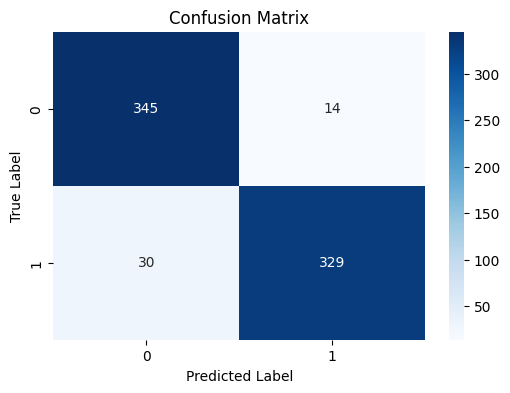

In [162]:
# Creando la matriz de confusión
# Con el punto de corte óptimo, trabajo ya con los datos de test

from sklearn.metrics import confusion_matrix
lr_probs = lr_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

umbral = 0.49083128816781285
etiquetas_predichas = (lr_probs >= umbral_optimo).astype(int)
cm = confusion_matrix(y_test, etiquetas_predichas)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [163]:
# Calculamos el AUC para test

lr_probs = lr_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [164]:
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Random Forest: ROC AUC=0.990


In [167]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


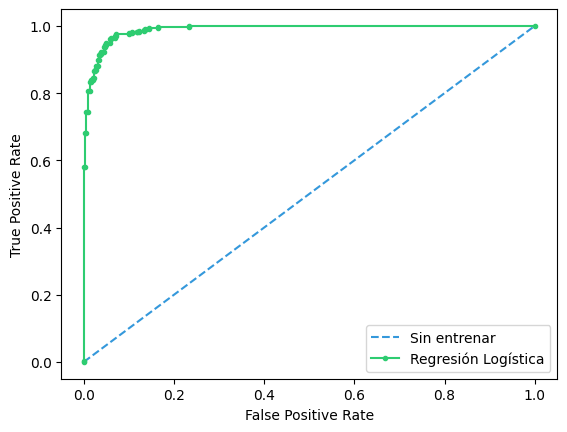

In [169]:
# Pintamos las curvas ROC
from matplotlib import pyplot
# plotear roc curves

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
pyplot.legend()
pyplot.show()

In [81]:
# Crear un DataFrame con los valores de fpr, tpr y umbrales

data = pd.DataFrame(zip(fpr, tpr, umbrales), columns=["FPR", "TPR", "Umbrales"])
data

,FPR,TPR,Umbrales
0,0.00,0.00,inf
1,0.00,0.11,1.00
2,0.00,0.30,0.99
3,0.00,0.45,0.98
4,0.00,0.55,0.97
...,...,...,...
56,0.35,1.00,0.04
57,0.46,1.00,0.03
58,0.61,1.00,0.02
59,0.81,1.00,0.01


In [170]:
# Evaluar el rendimiento del modelo (Logistic Regression)
from sklearn.metrics import classification_report
print(classification_report(y_test, etiquetas_predichas))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       359
           1       0.96      0.92      0.94       359

    accuracy                           0.94       718
   macro avg       0.94      0.94      0.94       718
weighted avg       0.94      0.94      0.94       718



In [172]:
# Realizamos un gridsearchcv para optimizar los hyperparametros de lr_model

from sklearn.model_selection import GridSearchCV

# Define los parámetros a ajustar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='f1')

# Ajusta el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Imprime el mejor puntaje F1
print("Mejor puntaje F1:", grid_search.best_score_)


Mejores parámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntaje F1: 0.9402815352979976


In [173]:
# prompt: implementar logistic regression con los Mejores parámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

from sklearn.linear_model import LogisticRegression

# Crea instancia de LogisticRegression con los mejores parámetros
lr_model_best = LogisticRegression(C=10, penalty='l1', solver='liblinear', random_state=27)

# Entrena el modelo
lr_model_best.fit(X_train, y_train)

# Predice las etiquetas en el conjunto de prueba
LogisticRegression_predictions_best = lr_model_best.predict(X_test)

# Calcula el F1-score para LogisticRegression con los mejores parámetros
LogisticRegression_f1_best = f1_score(y_test, LogisticRegression_predictions_best)
print(f"F1-score para LogisticRegression con mejores parámetros: {LogisticRegression_f1_best}")


F1-score para LogisticRegression con mejores parámetros: 0.9388335704125178


In [174]:
# prompt: genra 5 alumnos de prueba aleatoriamente para este dataset y probemos el modelo y sus predicciones

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que 'df' es tu DataFrame y 'rf_model_best' es tu modelo entrenado

# Seleccionar 5 alumnos aleatorios
alumnos_prueba = df_modelos.sample(n=15, random_state=42)

# Separar las características (X) y la variable objetivo (y) para los alumnos de prueba
X_prueba = alumnos_prueba.drop('Aprobado', axis=1)
y_prueba = alumnos_prueba['Aprobado']

# Hacer predicciones con el modelo
predicciones = lr_model_best.predict(X_prueba)

# Mostrar los resultados
print("Alumnos de prueba:")
print(alumnos_prueba)
print("\nPredicciones:")
print(predicciones)


Alumnos de prueba:
           Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
StudentID                                                               
2005        15       1          2                  4             0.14   
1197        16       1          0                  4             1.99   
3343        15       0          0                  0            10.59   
2709        18       1          1                  2            16.21   
1436        18       0          0                  0             3.58   
1322        15       1          0                  1            17.01   
2473        15       1          0                  2            14.37   
2704        17       0          0                  1             4.29   
1901        15       0          0                  1            12.19   
2058        17       1          0                  1            11.81   
3214        17       1          2                  3            10.98   
1576        16       0          

Matriz de confusión:
[[346  13]
 [ 31 328]]


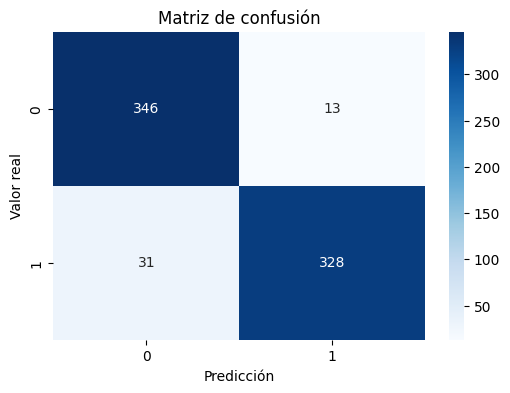

In [175]:
# prompt: medir la performance de lr_model e imprimir su matriz de confusión

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predice las etiquetas en el conjunto de prueba
lr_predictions = lr_model.predict(X_test)

# Crea la matriz de confusión
cm = confusion_matrix(y_test, lr_predictions)

# Imprime la matriz de confusión
print("Matriz de confusión:")
print(cm)

# Visualiza la matriz de confusión con un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎈 Conclusiones de esta entrega 🎈</b></div>

## Se realizó el estudio del dataset satisfactoriamente, analizando las distintas variables teniendo en cuenta como variable objetivo la calificación.

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Hallazgos principales:</font></h3>

* La variable Absences presenta una correlación negativa fuerte con GPA, confirma que las ausencias tienen fuerte incidencia en el desempeño.

* Tutoring presenta una correlación positiva débil con el desempeño.

* StudyTimeWeekly presenta una correlación positiva débil con el desempeño.

* El conteo de variables presenta asimetrias en las cantidades que deberán ser tenidas en cuenta si se desea entrenar modelos predictivos.

* No se encontraron factores demográficos que incidan en la nota o diferencias por género.
